O presente projeto foi desenvolvido durantes as aulas do "Intensivão de Python" da Hashtag Treinamentos

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

## Instalações

In [1]:
#Gráficos
#!pip install matplotlib
#!pip install seaborn

#IA
#!pip install scikit-learn

#### Importações - Bibliotecas

- Para usar o seaborn tem que importar o matplotlib junto

- As configurações do matplotlib são mais chatas para criar gráficos

In [2]:
import pandas as pd

import matplotlib.pyplot as plt 

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressorForest

from sklearn import metrics

#### Importar a Base de dados

In [ ]:
tabela = pd.read_csv('advertising.csv')

#### Tratamento de dados
- TV/Rádio/Jornal estão em MILHARES enquanto as vendas estão em MILHÕES

- Correlação -- Vai de 0 a 1
    - Quanto mais próximo de 1, maior a correlação
    - Valores acima de 0.7 são considerados correlações fortes

In [ ]:
display(tabela)

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [ ]:
#Primeiro panorama de comportamento
sns.heatmap(tabela.corr(), cmap='flare')

plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

    - Dados simulados e dados teste para treinar a IA
    - A divisão entre informações de treino e teste é arbitrária
        - A faixa varia entre 70% e 80% para teste
    
    
- Aprendendo a fazer uma previsão de vendas 


- Base de dados para ensinar a IA
    - Dados de Y = Quem vocêe quer prever
        - VENDAS
    - Dados de X = Quem vai ser usado para fazer a previsão
        - TV
        - RÁDIO
        - JORNAL


- test_size = 0,3 -- Definição manual do split da tabela


- random_state=1 -- Embaralha de uma forma aleatória e mantém ela fixa
    - A cada rodagem seria uma embaralhada diferente

In [ ]:
#Uma coluna
y = tabela['Vendas']

#Mais de uma coluna
x = tabela[['TV', 'Radio', 'Jornal']]

#Dados de treinos e dados de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

display(x_treino)
display(x_teste)
display(y_treino)
display(y_teste)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)


- O processo de treino é realizado uma vez

In [ ]:
modelo_regressaolinear = LinearRegression()

modelo_arvoredecisao = RandomForestRegression()

#Treinar os modelos
modelo_regressaolinear.fit(x_treino, y_treino)

modelo_arvoredecisao.fit(x_treino, y_treino)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece


- Para essa situação, os valores obtidos de R² são excelentes

In [ ]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#Comparação dos testes (R²)
print('R²')

print('Regressão linear: ', metrics.r2_score(y_teste, previsao_regressaolinear))

print('Árvore de decisão: ', metrics.r2_score(y_teste, previsao_arvoredecisao))

#### Visualização Gráfica das Previsões

- A árvore de decisões é o melhor modelo

In [ ]:
#Comparação visual entre a Regressão, a Árvore e o Y teste
tabela_auxiliar = pd.DataFrame()

tabela_auxiliar['y teste'] = y_teste

tabela_auxiliar['Previsão da Regressão Linear'] = previsao_regressaolinear

tabela_auxiliar['Previsão da Árvore de Decisão'] = previsao_arvoredecisao

sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

Agora é usar o modelo treinado

In [ ]:
#Importando uma tabela com novas informações
nova_tabela = pd.read_csv('novos.csv')

display(nova_tabela)

#Novas previsões
previsao = modelo_arvoredecisao.predict(nova_tabela)

print('Nova previsão: ')
print(previsao)

## Código completo

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


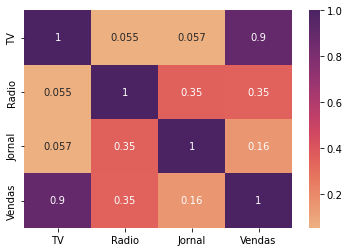

R²
Regressão linear:  0.9071151423684273
Árvore de decisão:  0.9614557045594944


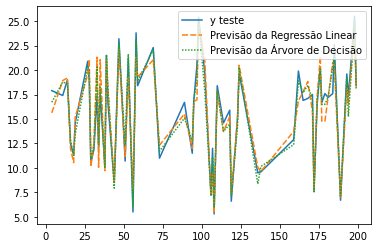

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


Nova previsão: 
[ 7.965  8.743 19.659]


In [15]:
#IMPORTAÇÕES
import pandas as pd

import matplotlib.pyplot as plt 

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics


#CÓDIGO
tabela = pd.read_csv('advertising.csv')

display(tabela)

sns.heatmap(tabela.corr(), cmap='flare', annot=True)
plt.show()

#Uma coluna
y = tabela['Vendas']

#Mais de uma coluna
x = tabela[['TV', 'Radio', 'Jornal']]

#Dados de treinos e dados de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#Modelos de IA
modelo_regressaolinear = LinearRegression()

modelo_arvoredecisao = RandomForestRegressor()

#Treinar os modelos
modelo_regressaolinear.fit(x_treino, y_treino)

modelo_arvoredecisao.fit(x_treino, y_treino)

#Testar os modelos
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#Comparação dos testes (R²)
print('R²')

print('Regressão linear: ', metrics.r2_score(y_teste, previsao_regressaolinear))

print('Árvore de decisão: ', metrics.r2_score(y_teste, previsao_arvoredecisao))

#Comparação visual entre a Regressão, a Árvore e o Y teste
tabela_auxiliar = pd.DataFrame()

tabela_auxiliar['y teste'] = y_teste

tabela_auxiliar['Previsão da Regressão Linear'] = previsao_regressaolinear

tabela_auxiliar['Previsão da Árvore de Decisão'] = previsao_arvoredecisao

sns.lineplot(data=tabela_auxiliar)
plt.show()

#Importando uma tabela com novas informações
nova_tabela = pd.read_csv('novos.csv')

display(nova_tabela)

#Novas previsões
previsao = modelo_arvoredecisao.predict(nova_tabela)

print('Nova previsão: ')
print(previsao)